In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the dataSet
df = pd.read_csv("CIDDS-001-external-week3.csv")

C:\Users\ABHINAV\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-04-05 00:00:09.191,0.000,TCP,26913_25,43618,EXT_SERVER,23.0,1,46,1,....S.,0,suspicious,---,---,---
1,2017-04-05 00:00:09.191,0.000,TCP,EXT_SERVER,23,26913_25,43618.0,1,40,1,.A.R..,0,suspicious,---,---,---
2,2017-04-05 00:02:56.395,0.000,TCP,26914_116,1817,EXT_SERVER,23.0,1,46,1,....S.,0,suspicious,---,---,---
3,2017-04-05 00:02:56.395,0.000,TCP,EXT_SERVER,23,26914_116,1817.0,1,40,1,.A.R..,0,suspicious,---,---,---
4,2017-04-05 00:03:23.251,0.001,TCP,26915_202,57272,EXT_SERVER,1433.0,1,46,1,....S.,0,suspicious,---,---,---
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153021,2017-04-11 08:38:08.408,67601.294,TCP,OPENSTACK_NET,49493,EXT_SERVER,8082.0,160681,12.2 M,1,.APRS.,0,normal,---,---,---
153022,2017-04-11 08:38:08.408,67601.294,TCP,EXT_SERVER,8082,OPENSTACK_NET,49494.0,172810,465.7 M,1,.AP.S.,0,normal,---,---,---
153023,2017-04-11 08:38:08.408,67601.294,TCP,OPENSTACK_NET,49494,EXT_SERVER,8082.0,170412,28.5 M,1,.APRS.,0,normal,---,---,---
153024,2017-04-11 08:38:08.599,67601.103,TCP,EXT_SERVER,8082,OPENSTACK_NET,49495.0,148533,394.9 M,1,.AP.S.,0,normal,---,---,---


In [4]:
#removing null columns
df.drop(['Date first seen','Src IP Addr','Dst IP Addr','Flows','Proto','Tos','attackType','attackID','attackDescription','Src Pt','Dst Pt'],axis=1,inplace=True)
df= pd.get_dummies(df, columns=['Flags'])
df

,Duration,Packets,Bytes,class,Flags_ 0x52,Flags_ 0x5b,Flags_ 0xc2,Flags_ 0xd3,Flags_ 0xd6,Flags_ 0xd7,...,Flags_.A..S.,Flags_.A..SF,Flags_.A.R..,Flags_.A.R.F,Flags_.A.RS.,Flags_.A.RSF,Flags_.AP.S.,Flags_.AP.SF,Flags_.APRS.,Flags_.APRSF
0,0.000,1,46,suspicious,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000,1,40,suspicious,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.000,1,46,suspicious,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000,1,40,suspicious,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0.001,1,46,suspicious,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153021,67601.294,160681,12.2 M,normal,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
153022,67601.294,172810,465.7 M,normal,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
153023,67601.294,170412,28.5 M,normal,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
153024,67601.103,148533,394.9 M,normal,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [5]:
df = df[['Duration', 'Packets', 'Bytes', 'Flags_  0x52', 'Flags_  0x5b',
       'Flags_  0xc2', 'Flags_  0xd3', 'Flags_  0xd6', 'Flags_  0xd7',
       'Flags_  0xdb', 'Flags_  0xdf', 'Flags_......', 'Flags_....S.',
       'Flags_...R..', 'Flags_...RS.', 'Flags_.A....', 'Flags_.A..S.',
       'Flags_.A..SF', 'Flags_.A.R..', 'Flags_.A.R.F', 'Flags_.A.RS.',
       'Flags_.A.RSF', 'Flags_.AP.S.', 'Flags_.AP.SF', 'Flags_.APRS.',
       'Flags_.APRSF', 'class']]

In [6]:
#We need to convert the Bytes column because it is write 4.5M and not 4 500 000

df['Bytes']=df['Bytes'].astype(str)
df['find']=df['Bytes'].str.find("M")
df.loc[df['find']!=-1,'Bytes']=df['Bytes'].str.slice(stop=-1)
df.loc[df['find']==-1,'Bytes']=df['Bytes']
df['Bytes']=df['Bytes'].astype(float)
df.loc[df['find']!=-1,'Bytes']=df['Bytes'].mul(1000000)
df=df.drop('find',axis=1)
df.head()

,Duration,Packets,Bytes,Flags_ 0x52,Flags_ 0x5b,Flags_ 0xc2,Flags_ 0xd3,Flags_ 0xd6,Flags_ 0xd7,Flags_ 0xdb,...,Flags_.A..SF,Flags_.A.R..,Flags_.A.R.F,Flags_.A.RS.,Flags_.A.RSF,Flags_.AP.S.,Flags_.AP.SF,Flags_.APRS.,Flags_.APRSF,class
0,0.000,1,46.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,suspicious
1,0.000,1,40.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,suspicious
2,0.000,1,46.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,suspicious
3,0.000,1,40.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,suspicious
4,0.001,1,46.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,suspicious


In [7]:
#features
#selecting coluns starting to second last
X=df.iloc[:,:26].values
X


array([[0.0000000e+00, 1.0000000e+00, 4.6000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 4.0000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 4.6000000e+01, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [6.7601294e+04, 1.7041200e+05, 2.8500000e+07, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [6.7601103e+04, 1.4853300e+05, 3.9490000e+08, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.7601103e+04, 1.4753800e+05, 2.9500000e+07, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [8]:
#labels or target variables
y=df.iloc[:,-1].values
y

array(['suspicious', 'suspicious', 'suspicious', ..., 'normal', 'normal',
       'normal'], dtype=object)

In [9]:
df

,Duration,Packets,Bytes,Flags_ 0x52,Flags_ 0x5b,Flags_ 0xc2,Flags_ 0xd3,Flags_ 0xd6,Flags_ 0xd7,Flags_ 0xdb,...,Flags_.A..SF,Flags_.A.R..,Flags_.A.R.F,Flags_.A.RS.,Flags_.A.RSF,Flags_.AP.S.,Flags_.AP.SF,Flags_.APRS.,Flags_.APRSF,class
0,0.000,1,46.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,suspicious
1,0.000,1,40.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,suspicious
2,0.000,1,46.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,suspicious
3,0.000,1,40.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,suspicious
4,0.001,1,46.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,suspicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153021,67601.294,160681,12200000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
153022,67601.294,172810,465700000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,normal
153023,67601.294,170412,28500000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,normal
153024,67601.103,148533,394900000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,normal


In [10]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
#creating an object of Label_Encoder
Ly=LabelEncoder()
y=Ly.fit_transform(y)
y

array([2, 2, 2, ..., 1, 1, 1])

In [11]:
#classes in ascending order
Ly.classes_

array(['attacker', 'normal', 'suspicious', 'unknown', 'victim'],
      dtype=object)

In [12]:
Ly.inverse_transform([0])

array(['attacker'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [14]:
X_train.shape

(107118, 26)

In [15]:
X_test.shape

(45908, 26)

In [16]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train,y_train)

C:\Users\ABHINAV\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:44:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [17]:
X_test[0]

array([1.0964e+01, 1.5000e+01, 2.1630e+03, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00])

In [18]:
#Actual value
y_test[0]

2

In [19]:
# Predict the model
#predicted value
Yp=xgb_model.predict(X_test)
Yp


array([2, 2, 3, ..., 0, 2, 2])

In [20]:
#Confusion matrix to determine how many valid predictions we have made till now
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Yp)
cm

array([[ 2161,     0,   641,     1,     0],
       [    0,  1822,     7,    11,     0],
       [  117,     7, 29035,   150,    19],
       [    1,     2,   146,  9987,     0],
       [    0,     0,   670,     0,  1131]], dtype=int64)

In [21]:
#Accuracy calculation
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Yp)*100

96.14010629955563

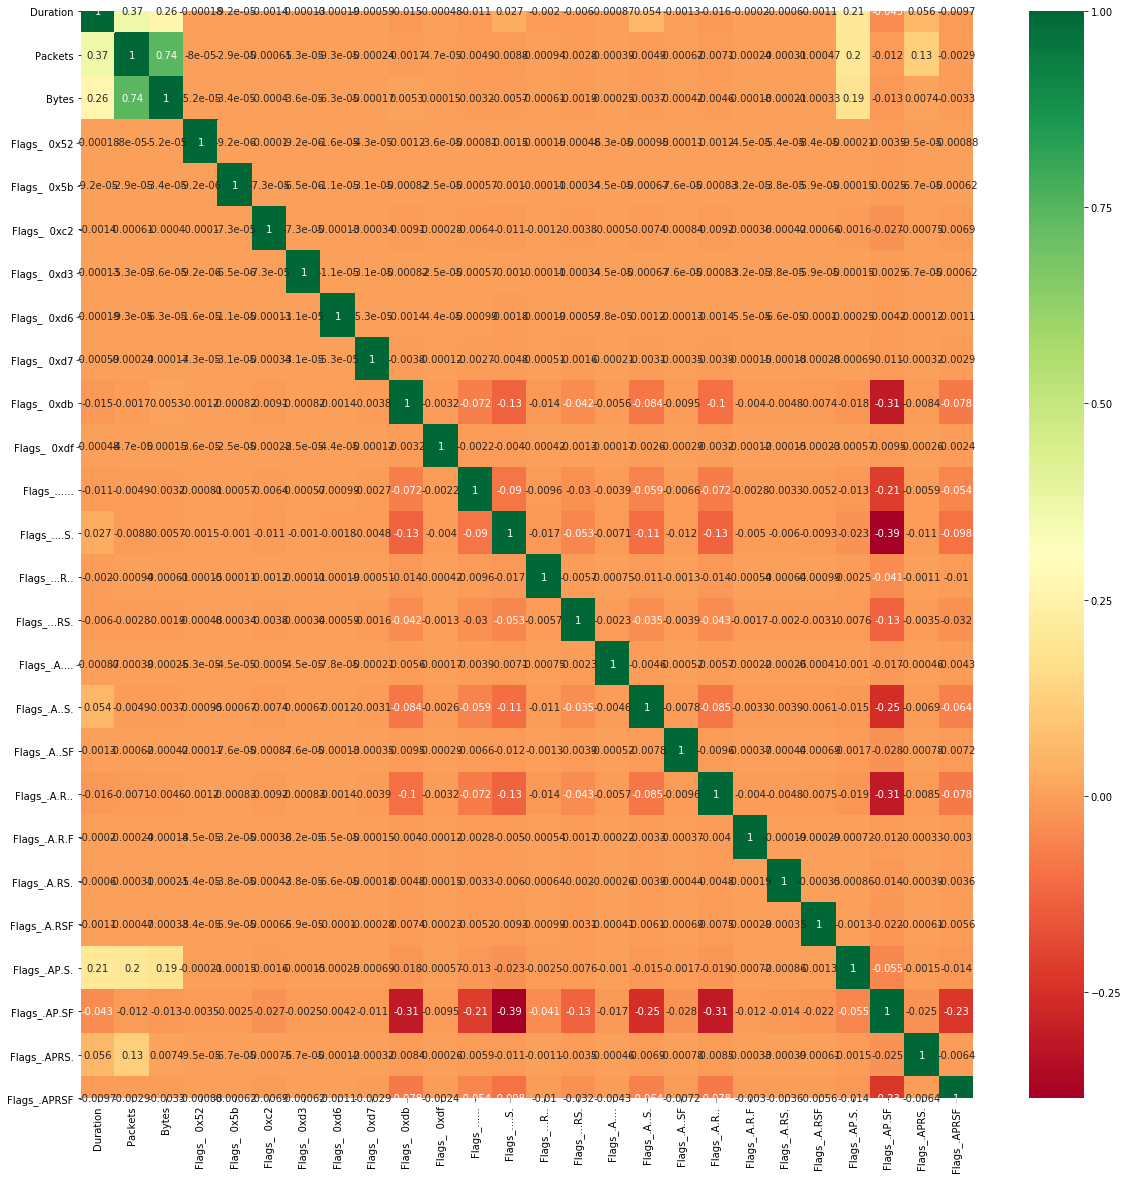

In [22]:
#Heat map
import seaborn as sns
import matplotlib.pyplot as plt
cormat=df.corr()
top_corr_features=cormat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')